## Importing required liabraries

In [86]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, power_transform
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# setting color palette
sns.set_palette(sns.color_palette("rocket_r"))

## Reading the Data

In [87]:
housing=pd.read_csv('housing.csv')
housing.shape

(20640, 10)

In [88]:
# checking the data
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [89]:
# checking Nan Values
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [90]:
## checking the data types
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

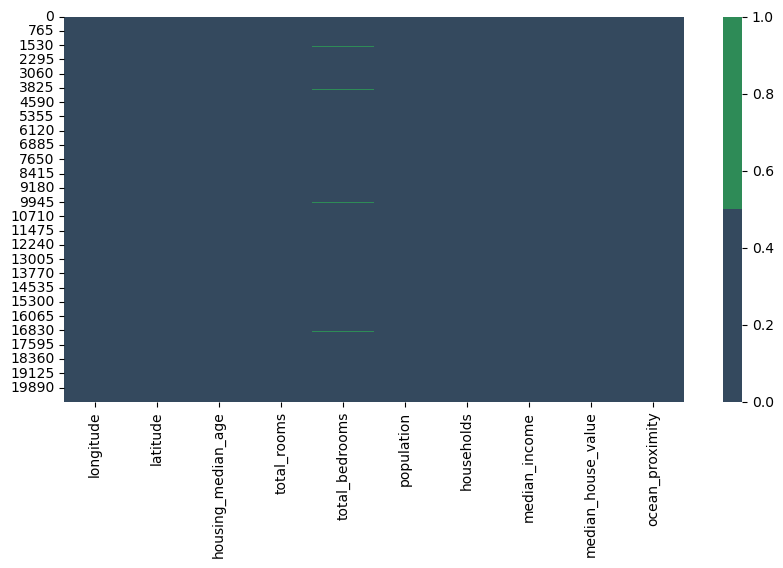

In [91]:
# 'total_bedrooms' have null enteries visualizing the data
# sns.displot(data=housing.isna().melt(value_name='missing'), y='variable',
#              hue='missing',
#              multiple='fill',
#              height=8,
#              aspect=1.1
            
#         )
# plt.axvline(0.4, color='r')
# plt.show()

plt.figure(figsize=(10,5))

colours = ['#34495E', 'seagreen'] 
sns.heatmap(housing.isnull(), cmap=sns.color_palette(colours))
plt.show()

In [92]:
## Treating the Missing values
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(housing['total_bedrooms'].interpolate())
housing.isna().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Now, we have treated the missing data & we have zero null enteries.

## Proceeding for the Clustering

In [93]:
## Creating the subset of housing data for clustering

cluster_data=housing[['longitude', 'latitude', 'median_house_value']]
cluster_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


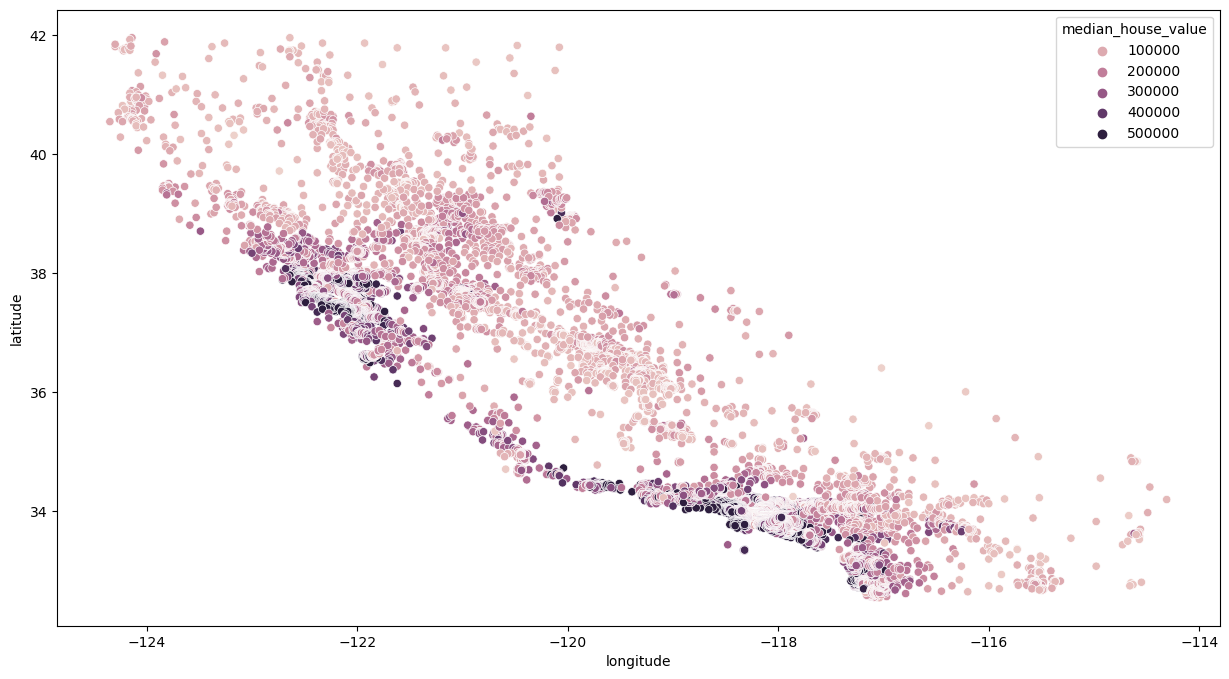

In [94]:
## Vizualizing the Data

plt.figure(figsize=(15,8))
sns.scatterplot(data=cluster_data, x='longitude', y='latitude',hue='median_house_value')
plt.show()

In [95]:
## Splitting the Data

Xtrain, Xtest, ytrain, ytest=train_test_split(cluster_data[['latitude', 'longitude']], 
                                              cluster_data[['median_house_value']], 
                                              test_size=0.33,
                                              random_state=0)

In [96]:
## Normalizing the Data
Xtrain_norm, Xtest_norm=normalize(Xtrain), normalize(Xtest)

## Checking the data distribution

In [97]:
Xtrain.describe()

,latitude,longitude
count,13828.000000,13828.000000
mean,35.627488,-119.567400
std,2.137755,2.005475
min,32.550000,-124.350000
25%,33.930000,-121.800000
50%,34.250000,-118.490000
75%,37.720000,-118.000000
max,41.950000,-114.310000


In [98]:
pd.DataFrame(Xtrain_norm, columns=Xtrain.columns).describe()

,latitude,longitude
count,13828.000000,13828.000000
mean,0.285328,-0.958352
std,0.011688,0.003527
min,0.267835,-0.963465
25%,0.276074,-0.961136
50%,0.278482,-0.960441
75%,0.295030,-0.955488
max,0.328682,-0.944441


## Fitting and Evaluating the Model

In [99]:

kmeans=KMeans(n_clusters=3, random_state=0, n_init='auto')
kmeans.fit(Xtrain_norm)

KMeans(n_clusters=3, n_init='auto', random_state=0)

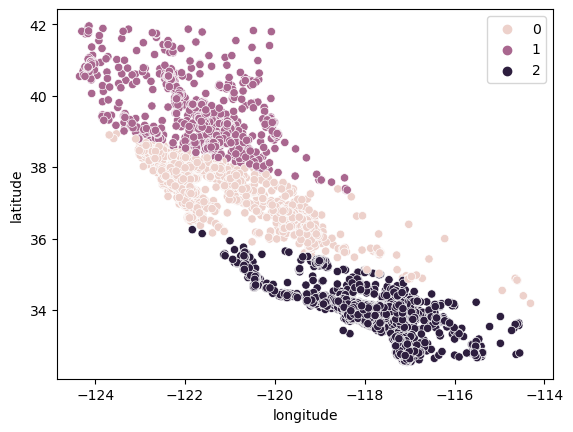

In [100]:
## Visualize the fitted data with obtained label
sns.scatterplot(data=Xtrain, x='longitude', y='latitude',hue=kmeans.labels_)
plt.show()

We see that the data are now clearly split into 3 distinct groups (Northern California, Central California, and Southern California). We can also look at the distribution of median house prices in these 3 groups using a boxplot. 

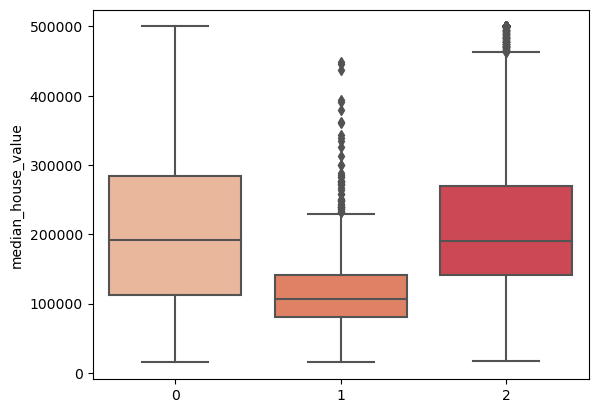

In [101]:
sns.boxplot(x = kmeans.labels_, y = ytrain['median_house_value'])
plt.show()

## Evaluating the model

In [102]:
silhouette_score(Xtrain_norm, kmeans.labels_, metric='euclidean')

0.7499371920703547

## Choosing the best number of clusters

In [103]:
cluster_n = range(2, 9)
fits = []
score = []

for K in cluster_n:
    # train the model for the current number of cluster for trainning data
    model=KMeans(n_clusters=K, random_state=0, n_init='auto').fit(Xtrain_norm)

    # append the model to fits
    fits.append(model)

    # append the silhouette score
    score.append(silhouette_score(Xtrain_norm, model.labels_, metric='euclidean'))

#### Visually looking at a few different values of k. 

For K = 2


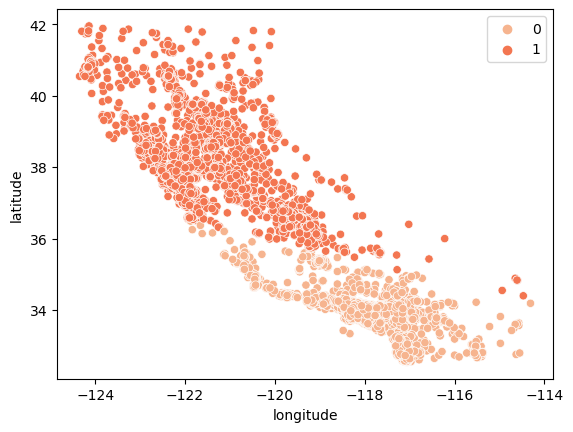

In [104]:
print('For K = 2')

sns.scatterplot(data=Xtrain,x=Xtrain.columns[1],y=Xtrain.columns[0], hue=fits[0].labels_)
plt.show()

For K = 4


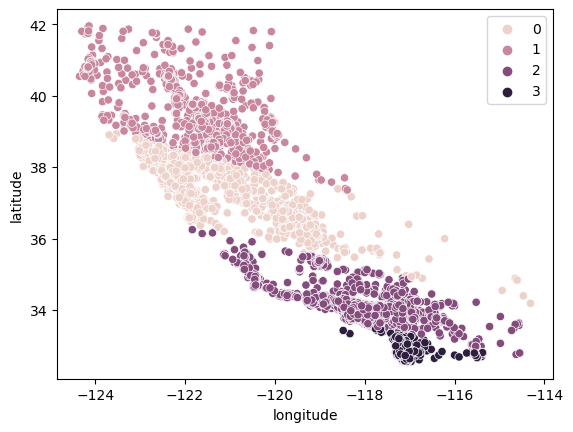

In [105]:
print('For K = 4')

sns.scatterplot(data=Xtrain,x=Xtrain.columns[1],y=Xtrain.columns[0], hue=fits[2].labels_)
plt.show()

For K = 7


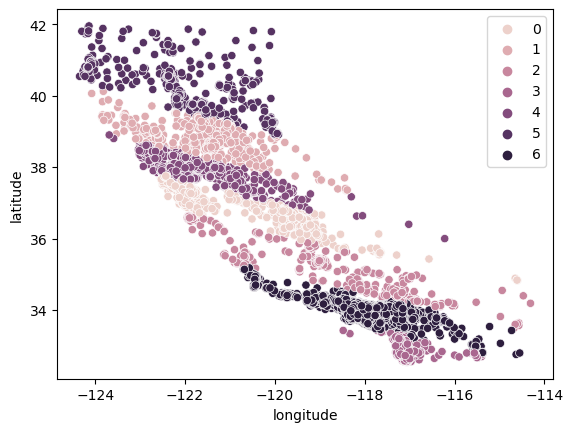

In [106]:
print('For K = 7')

sns.scatterplot(data=Xtrain,x=Xtrain.columns[1],y=Xtrain.columns[0], hue=fits[5].labels_)
plt.show()

The above graph appears to have too many clusters. We have sacrifice easy interpretation of the clusters for a “more accurate” geo-clustering result. 

Elbow plot


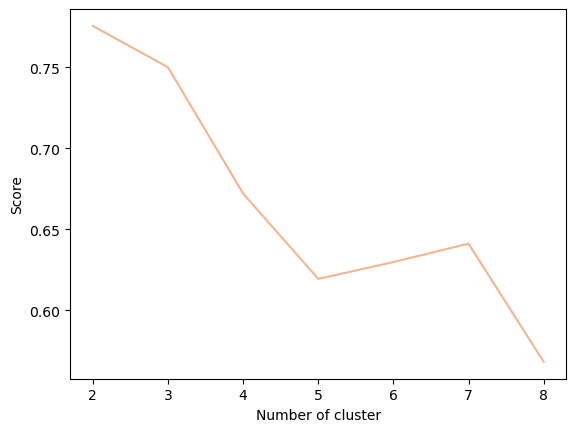

In [109]:
print("Elbow plot")
sns.lineplot(x=cluster_n, y=score)
plt.xlabel('Number of cluster')
plt.ylabel("Score")
plt.show()